In [151]:
import matplotlib
import random
import timeit
import matplotlib.pyplot as plt
import math

In [152]:
from bad_sorts import create_random_list
from good_sorts import quicksort

In [153]:
def dual_quicksort(L):
    copy = dual_quicksort_copy(L)
    for i in range(len(L)):
        L[i] = copy[i]

In [154]:
def dual_quicksort_copy(L):
    if len(L) < 2:
        return L
    if len(L) == 2:
        return [min(L), max(L)]

    pivot_1 = min(L[0], L[1])
    pivot_2 = max(L[0], L[1])
    left, mid, right = [], [], []

    for num in L[2:]:
        if num < pivot_1:
            left.append(num)
        elif num > pivot_2:
            right.append(num)
        else:
            mid.append(num)

    return dual_quicksort_copy(left) + [pivot_1] + dual_quicksort_copy(mid) + [pivot_2] + dual_quicksort_copy(right)


In [155]:
lengths = [math.ceil(1.2**x) for x in range(50)]          
max_value = 2**30
runs = 10

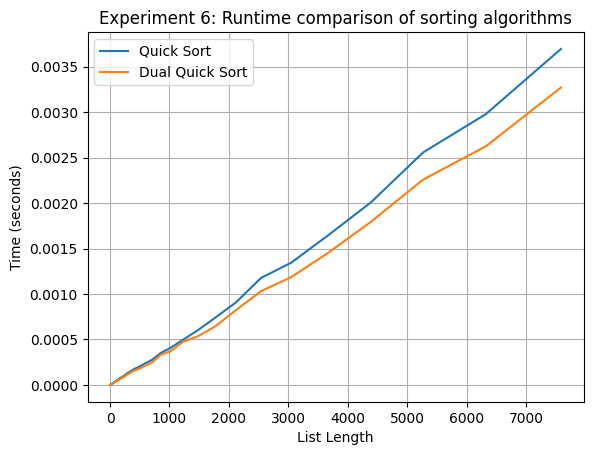

In [156]:
data_qs, data_dqs = [], []

for n in lengths:
    t1 = t2 = 0

    for _ in range(runs):
        L = create_random_list(n, max_value)

        start = timeit.default_timer()
        quicksort(L.copy())
        t1 += timeit.default_timer() - start

        start = timeit.default_timer()
        dual_quicksort(L.copy())
        t2 += timeit.default_timer() - start
    
    data_qs.append(t1 / runs)
    data_dqs.append(t2 / runs)

plt.plot(lengths, data_qs, label='Quick Sort')
plt.plot(lengths, data_dqs, label='Dual Quick Sort')
plt.title("Experiment 6: Runtime comparison of sorting algorithms")
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()
